# Analyzing Supermarket Sales Data

***By: Tadesse Abateneh***

In [3]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd

## Load Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
sales = pd.read_csv('supermarket_sales.csv')

In [6]:
sales.head()

Invoice ID       Date   Time  Gender     Location     City Member  \
0   460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  
0  Groceries     30         1     30    Cash       2  
1    Fashion     35         5    175    Card       3  
2   Clothing     57         2    114    Cash       5  
3   Sporting     89         4    356    Gpay       1  
4      Books     82         5    410    Cash       4

### Indexing and Slicing data

In [9]:
sales[['Invoice ID']]

Invoice ID
0     460489604
1     471006167
2     411909258
3     487313402
4     197763430
..          ...
995   818829599
996   556589713
997    82324424
998   783661702
999   759171975

[1000 rows x 1 columns]

In [12]:
sales['Category'].unique()

array(['Groceries', 'Fashion', 'Clothing', 'Sporting', 'Books',
       'Furniture'], dtype=object)

In [13]:
sales.iloc[200]

Invoice ID      576523018
Date            2/15/2018
Time                12:35
Gender               Male
Location      Water tower
City              Chicago
Member                 No
Category        Groceries
Price                  82
Quantity                1
Total                  82
Payment              Card
Rating                  4
Name: 200, dtype: object

In [14]:
sales[200:210]

Invoice ID       Date   Time  Gender     Location     City Member  \
200   576523018  2/15/2018  12:35    Male  Water tower  Chicago     No   
201   414119922  1/30/2018  11:07    Male  Water tower  Chicago     No   
202   123247697   2/8/2018  20:03    Male   Brookfield  NewYork     No   
203    40419058  1/26/2018  14:53    Male  Water tower  Chicago    Yes   
204   890497298  2/25/2018  18:06  Female  Water tower  Chicago     No   
205   885702268  1/28/2018  12:45    Male   Brookfield  NewYork     No   
206   172252194  3/22/2018  20:10  Female    Park lane   Dallas     No   
207   866140211  2/25/2018  13:34  Female    Park lane   Dallas     No   
208   597678548  3/15/2018  17:35    Male  Water tower  Chicago    Yes   
209   428818456  2/25/2018  18:50    Male    Park lane   Dallas    Yes   

      Category  Price  Quantity  Total Payment  Rating  
200  Groceries     82         1     82    Card       4  
201   Sporting     44         7    308    Card       3  
202  Groceries     22         7    154    Card       5  
203      Books     95         6    570    Card       1  
204   Clothing     69         2    138    Cash       2  
205  Groceries     89         6    534    Card       1  
206      Books     41         6    246    Card       4  
207   Clothing     54         6    324    Gpay       4  
208   Sporting     34         3    102    Cash       1  
209      Books     94         5    470    Cash       2

#### Conditional indexing

In [17]:
sales[sales['Gender'] == 'Male'].head()

Invoice ID       Date   Time Gender     Location     City Member  \
0   460489604  1/25/2018  16:46   Male   Brookfield  NewYork    Yes   
2   411909258  2/25/2018  13:33   Male  Water tower  Chicago     No   
5   263634050   3/9/2018  17:55   Male   Brookfield  NewYork    Yes   
6    99646662   3/4/2018  13:21   Male  Water tower  Chicago     No   
7   188869875   3/8/2018  13:24   Male    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  
0  Groceries     30         1     30    Cash       2  
2   Clothing     57         2    114    Cash       5  
5   Clothing     52         4    208    Gpay       3  
6   Clothing     81         3    243    Cash       4  
7      Books     80         2    160    Cash       3

In [18]:
sales[sales['Gender'] == 'Female'].head()

Invoice ID       Date   Time  Gender     Location     City Member  \
1    471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
3    487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4    197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   
9    562942936  2/24/2018  16:05  Female    Park lane   Dallas     No   
10   388412668  2/26/2018  11:32  Female   Brookfield  NewYork     No   

     Category  Price  Quantity  Total Payment  Rating  
1     Fashion     35         5    175    Card       3  
3    Sporting     89         4    356    Gpay       1  
4       Books     82         5    410    Cash       4  
9       Books     80         2    160    Cash       4  
10  Furniture     35         4    140    Gpay       4

In [21]:
sales[sales['Total'] > 100].head()

Invoice ID       Date   Time  Gender     Location     City Member  \
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   
5   263634050   3/9/2018  17:55    Male   Brookfield  NewYork    Yes   

   Category  Price  Quantity  Total Payment  Rating  
1   Fashion     35         5    175    Card       3  
2  Clothing     57         2    114    Cash       5  
3  Sporting     89         4    356    Gpay       1  
4     Books     82         5    410    Cash       4  
5  Clothing     52         4    208    Gpay       3

In [22]:
sales['Payment'].unique()

array(['Cash', 'Card', 'Gpay'], dtype=object)

In [23]:
sales[sales['Payment'] == 'Cash']

Invoice ID       Date   Time  Gender     Location     City Member  \
0     460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
2     411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
4     197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   
6      99646662   3/4/2018  13:21    Male  Water tower  Chicago     No   
7     188869875   3/8/2018  13:24    Male    Park lane   Dallas     No   
..          ...        ...    ...     ...          ...      ...    ...   
989   941364541  3/13/2018  14:53  Female   Brookfield  NewYork     No   
990   752407865  1/15/2018  10:01    Male  Water tower  Chicago    Yes   
993   455112063  3/19/2018  17:30  Female   Brookfield  NewYork    Yes   
994   446582560  1/31/2018  19:00    Male  Water tower  Chicago     No   
998   783661702  1/29/2018  15:44  Female   Brookfield  NewYork     No   

      Category  Price  Quantity  Total Payment  Rating  
0    Groceries     30         1     30    Cash       2  
2     Clothing     57         2    114    Cash       5  
4        Books     82         5    410    Cash       4  
6     Clothing     81         3    243    Cash       4  
7        Books     80         2    160    Cash       3  
..         ...    ...       ...    ...     ...     ...  
989   Sporting     19         7    133    Cash       1  
990   Clothing     25         4    100    Cash       5  
993   Clothing      3         3      9    Cash       2  
994    Fashion     29         5    145    Cash       4  
998   Clothing     89         7    623    Cash       5  

[344 rows x 13 columns]

### Data Selection - query()

In [24]:
sales.query('City=="NewYork"')

Invoice ID       Date   Time  Gender    Location     City Member  \
0     460489604  1/25/2018  16:46    Male  Brookfield  NewYork    Yes   
5     263634050   3/9/2018  17:55    Male  Brookfield  NewYork    Yes   
10    388412668  2/26/2018  11:32  Female  Brookfield  NewYork     No   
14    547572603  3/21/2018  13:23  Female  Brookfield  NewYork     No   
15    355981315  2/15/2018  15:47  Female  Brookfield  NewYork    Yes   
..          ...        ...    ...     ...         ...      ...    ...   
991   699906043  2/15/2018  12:58    Male  Brookfield  NewYork    Yes   
992   927909627   3/2/2018  13:35    Male  Brookfield  NewYork     No   
993   455112063  3/19/2018  17:30  Female  Brookfield  NewYork    Yes   
997    82324424   2/6/2018  11:44    Male  Brookfield  NewYork     No   
998   783661702  1/29/2018  15:44  Female  Brookfield  NewYork     No   

      Category  Price  Quantity  Total Payment  Rating  
0    Groceries     30         1     30    Cash       2  
5     Clothing     52         4    208    Gpay       3  
10   Furniture     35         4    140    Gpay       4  
14     Fashion     98         7    686    Gpay       3  
15    Clothing     78         5    390    Card       5  
..         ...    ...       ...    ...     ...     ...  
991  Furniture     96         7    672    Card       3  
992      Books     54         1     54    Card       1  
993   Clothing      3         3      9    Cash       2  
997   Clothing     71         5    355    Card       3  
998   Clothing     89         7    623    Cash       5  

[340 rows x 13 columns]

In [25]:
sales[sales['City'] == 'NewYork']

Invoice ID       Date   Time  Gender    Location     City Member  \
0     460489604  1/25/2018  16:46    Male  Brookfield  NewYork    Yes   
5     263634050   3/9/2018  17:55    Male  Brookfield  NewYork    Yes   
10    388412668  2/26/2018  11:32  Female  Brookfield  NewYork     No   
14    547572603  3/21/2018  13:23  Female  Brookfield  NewYork     No   
15    355981315  2/15/2018  15:47  Female  Brookfield  NewYork    Yes   
..          ...        ...    ...     ...         ...      ...    ...   
991   699906043  2/15/2018  12:58    Male  Brookfield  NewYork    Yes   
992   927909627   3/2/2018  13:35    Male  Brookfield  NewYork     No   
993   455112063  3/19/2018  17:30  Female  Brookfield  NewYork    Yes   
997    82324424   2/6/2018  11:44    Male  Brookfield  NewYork     No   
998   783661702  1/29/2018  15:44  Female  Brookfield  NewYork     No   

      Category  Price  Quantity  Total Payment  Rating  
0    Groceries     30         1     30    Cash       2  
5     Clothing     52         4    208    Gpay       3  
10   Furniture     35         4    140    Gpay       4  
14     Fashion     98         7    686    Gpay       3  
15    Clothing     78         5    390    Card       5  
..         ...    ...       ...    ...     ...     ...  
991  Furniture     96         7    672    Card       3  
992      Books     54         1     54    Card       1  
993   Clothing      3         3      9    Cash       2  
997   Clothing     71         5    355    Card       3  
998   Clothing     89         7    623    Cash       5  

[340 rows x 13 columns]

In [26]:
sales.query('100 < Total < 200')

Invoice ID       Date   Time  Gender     Location     City Member  \
1     471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2     411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
7     188869875   3/8/2018  13:24    Male    Park lane   Dallas     No   
9     562942936  2/24/2018  16:05  Female    Park lane   Dallas     No   
10    388412668  2/26/2018  11:32  Female   Brookfield  NewYork     No   
..          ...        ...    ...     ...          ...      ...    ...   
977   614557665  3/22/2018  17:16  Female    Park lane   Dallas     No   
981   418253101  3/14/2018  12:25  Female   Brookfield  NewYork     No   
989   941364541  3/13/2018  14:53  Female   Brookfield  NewYork     No   
994   446582560  1/31/2018  19:00    Male  Water tower  Chicago     No   
995   818829599  3/26/2018  11:19    Male    Park lane   Dallas     No   

      Category  Price  Quantity  Total Payment  Rating  
1      Fashion     35         5    175    Card       3  
2     Clothing     57         2    114    Cash       5  
7        Books     80         2    160    Cash       3  
9        Books     80         2    160    Cash       4  
10   Furniture     35         4    140    Gpay       4  
..         ...    ...       ...    ...     ...     ...  
977   Clothing     49         3    147    Cash       5  
981    Fashion     81         2    162    Gpay       5  
989   Sporting     19         7    133    Cash       1  
994    Fashion     29         5    145    Cash       4  
995  Groceries     31         4    124    Card       3  

[231 rows x 13 columns]

In [28]:
sales.query('Payment == "Cash" & City == "NewYork" & Total < 50')

Invoice ID       Date   Time  Gender    Location     City Member  \
0     460489604  1/25/2018  16:46    Male  Brookfield  NewYork    Yes   
81    336967276  1/19/2018  17:54    Male  Brookfield  NewYork     No   
95    842361554  1/14/2018  16:17    Male  Brookfield  NewYork    Yes   
159   582323814  1/13/2018  20:06    Male  Brookfield  NewYork    Yes   
238   565456402  1/23/2018  14:51  Female  Brookfield  NewYork     No   
257   874941247   3/1/2018  11:24  Female  Brookfield  NewYork     No   
301   479562097  2/16/2018  14:03  Female  Brookfield  NewYork     No   
382   376812677  1/10/2018  18:04  Female  Brookfield  NewYork     No   
401   196926207   3/3/2018  13:08  Female  Brookfield  NewYork    Yes   
499   253349866  2/16/2018  19:06    Male  Brookfield  NewYork    Yes   
506   187709802  1/24/2018  10:43    Male  Brookfield  NewYork    Yes   
514   148516620   2/8/2018  12:29  Female  Brookfield  NewYork     No   
534   261411790  3/29/2018  15:51    Male  Brookfield  NewYork     No   
571   487019311  1/21/2018  16:33  Female  Brookfield  NewYork    Yes   
628   247158611   2/8/2018  16:27  Female  Brookfield  NewYork     No   
777   645707148  3/18/2018  16:23  Female  Brookfield  NewYork     No   
857   480320443   1/8/2018  10:52    Male  Brookfield  NewYork     No   
870     5906917  1/28/2018  10:00  Female  Brookfield  NewYork    Yes   
993   455112063  3/19/2018  17:30  Female  Brookfield  NewYork    Yes   

      Category  Price  Quantity  Total Payment  Rating  
0    Groceries     30         1     30    Cash       2  
81       Books     36         1     36    Cash       5  
95    Clothing      5         1      5    Cash       2  
159    Fashion      5         4     20    Cash       2  
238  Groceries     28         1     28    Cash       3  
257   Sporting     27         1     27    Cash       3  
301      Books     39         1     39    Cash       2  
382  Furniture     11         3     33    Cash       4  
401   Clothing      7         4     28    Cash       3  
499      Books     44         1     44    Cash       1  
506    Fashion     20         1     20    Cash       1  
514      Books     10         3     30    Cash       2  
534  Groceries     10         1     10    Cash       3  
571  Furniture      3         1      3    Cash       5  
628    Fashion      5         1      5    Cash       3  
777    Fashion      6         2     12    Cash       4  
857   Sporting      4         6     24    Cash       2  
870  Furniture     16         3     48    Cash       3  
993   Clothing      3         3      9    Cash       2

In [31]:
sales.sum()

Invoice ID                                         494493053341
Date          1/25/20183/19/20182/25/20181/22/20182/18/20183...
Time          16:4616:4813:3313:3815:3117:5513:2113:2415:331...
Gender        MaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFema...
Location      BrookfieldWater towerWater towerPark lanePark ...
City          NewYorkChicagoChicagoDallasDallasNewYorkChicag...
Member        YesYesNoYesNoYesNoNoYesNoNoNoNoYesNoYesYesYesY...
Category      GroceriesFashionClothingSportingBooksClothingC...
Price                                                     51112
Quantity                                                   4059
Total                                                    207788
Payment       CashCardCashGpayCashGpayCashCashCardCashGpayCa...
Rating                                                     2972
dtype: object

In [32]:
sales.sum()['Total']

207788

In [33]:
sales.sum()['Quantity']

4059

In [35]:
# Maximum amount spend by the user
sales.max()['Total']

693

In [37]:
# Get the users who have spent the maximum amount
sales[sales['Total'] == sales.max()['Total']]

Invoice ID       Date   Time  Gender     Location     City Member  \
47    315624039  3/30/2018  19:45  Female  Water tower  Chicago    Yes   
679   270918350  3/27/2018  13:21  Female    Park lane   Dallas    Yes   

      Category  Price  Quantity  Total Payment  Rating  
47   Groceries     99         7    693    Gpay       3  
679  Groceries     99         7    693    Gpay       2

In [40]:
# Get minimum amount spend by the user
sales.min()['Total']

1

In [41]:
# Get the user who have spent the minimum amount
sales[sales['Total'] == sales.min()['Total']]

Invoice ID       Date   Time  Gender   Location    City Member  \
184   801334050  1/21/2018  20:18  Female  Park lane  Dallas     No   
587   646176653  3/10/2018  19:39    Male  Park lane  Dallas    Yes   

      Category  Price  Quantity  Total Payment  Rating  
184  Furniture      1         1      1    Gpay       2  
587   Sporting      1         1      1    Cash       2

In [42]:
# Get Average amount spend by the user
sales.mean()['Total']

C:\Users\tedoa\AppData\Local\Temp\ipykernel_15848\3973271634.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sales.mean()['Total']


207.788

## Clauses - groupby()

In [43]:
sales.head()

Invoice ID       Date   Time  Gender     Location     City Member  \
0   460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  
0  Groceries     30         1     30    Cash       2  
1    Fashion     35         5    175    Card       3  
2   Clothing     57         2    114    Cash       5  
3   Sporting     89         4    356    Gpay       1  
4      Books     82         5    410    Cash       4

In [44]:
# Get the total amount spend by the user in each city separately
sales.groupby('City').sum()

Invoice ID  Price  Quantity  Total  Rating
City                                                 
Chicago  164244758326  16152      1307  65215    1023
Dallas   160721744770  17289      1344  70432    1003
NewYork  169526550245  17671      1408  72141     946

In [45]:
sales.groupby('City').sum()['Total']

City
Chicago    65215
Dallas     70432
NewYork    72141
Name: Total, dtype: int64

In [46]:
sales.groupby('Date').sum()['Total']

Date
1/1/2018     2649
1/10/2018    1116
1/11/2018    1562
1/12/2018    2625
1/13/2018    2340
             ... 
3/5/2018     4616
3/6/2018     1915
3/7/2018     1048
3/8/2018     2638
3/9/2018     4300
Name: Total, Length: 89, dtype: int64

In [47]:
# What amount of money was spent on Fashion, Clothing, and Groceries?
sales.groupby('Category').sum()['Total']

Category
Books        36103
Clothing     35925
Fashion      32778
Furniture    34141
Groceries    31236
Sporting     37605
Name: Total, dtype: int64

In [51]:
# What amount of money was spent on Fashion, Clothing, and Groceries?
Fashion = sales.groupby('Category').sum()['Total']['Fashion']
Clothing = sales.groupby('Category').sum()['Total']['Clothing']
Groceries = sales.groupby('Category').sum()['Total']['Groceries']

print(f"Fashion: {Fashion} \nClothing: {Clothing} \nGroceries: {Groceries}")

Fashion: 32778 
Clothing: 35925 
Groceries: 31236


In [52]:
# What amount of money was spent on Member and non-Member?
sales.groupby('Member').sum()['Total']

Member
No     100245
Yes    107543
Name: Total, dtype: int64

## Ansewering Business Questions
1. Which location has highest and the lowest sales?
2. Represent the sales on a bar chart, also show the market share for each location using a pie chart.

In [53]:
# Which location has highest and the lowest sales?
location_list = sales.groupby('Location')

In [54]:
# Get all the location
location = [ x for x, y in location_list ]
location

['Brookfield', 'Park lane', 'Water tower']

In [58]:
# Get total money spent on each location
total_on_location = sales.groupby('Location').sum()['Total']
total_on_location

Location
Brookfield     72141
Park lane      70432
Water tower    65215
Name: Total, dtype: int64

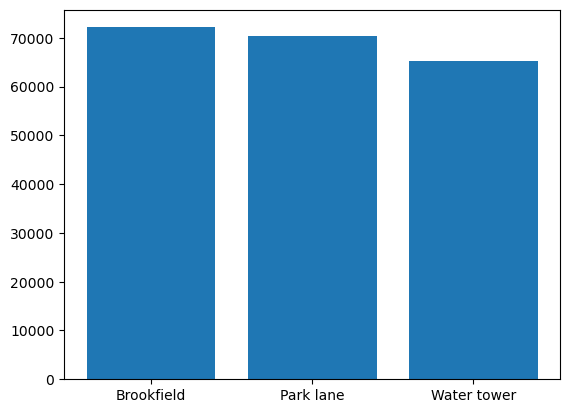

In [62]:
# Represent sales on a bar chart for each location
plt.bar(location, total_on_location)
plt.show()

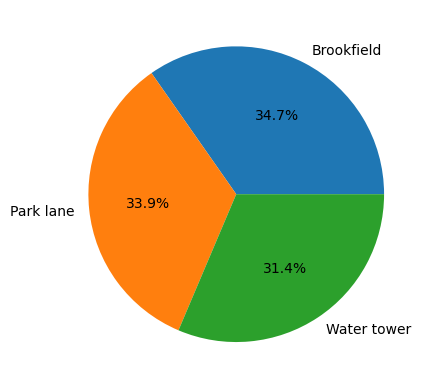

In [65]:
# Show the market share for each location on pie chart
plt.pie(total_on_location, labels=location, autopct='%1.1f%%')
plt.show()

3. Which location has more female customers and which location has more male?

In [67]:
# Group people based on location
sales.groupby(['Location']).count()

Invoice ID  Date  Time  Gender  City  Member  Category  Price  \
Location                                                                     
Brookfield          340   340   340     340   340     340       340    340   
Park lane           332   332   332     332   332     332       332    332   
Water tower         328   328   328     328   328     328       328    328   

             Quantity  Total  Payment  Rating  
Location                                       
Brookfield        340    340      340     340  
Park lane         332    332      332     332  
Water tower       328    328      328     328

In [68]:
# Group people based on location and gender
sales.groupby(['Location', 'Gender']).count()

Invoice ID  Date  Time  City  Member  Category  Price  \
Location    Gender                                                          
Brookfield  Female         179   179   179   179     179       179    179   
            Male           161   161   161   161     161       161    161   
Park lane   Female         179   179   179   179     179       179    179   
            Male           153   153   153   153     153       153    153   
Water tower Female         143   143   143   143     143       143    143   
            Male           185   185   185   185     185       185    185   

                    Quantity  Total  Payment  Rating  
Location    Gender                                    
Brookfield  Female       179    179      179     179  
            Male         161    161      161     161  
Park lane   Female       179    179      179     179  
            Male         153    153      153     153  
Water tower Female       143    143      143     143  
            Male         185    185      185     185

In [76]:
# Select Invoice ID
location_sales = sales.groupby(['Gender', 'Location']).count()['Invoice ID']

In [77]:
location_sales

Gender  Location   
Female  Brookfield     179
        Park lane      179
        Water tower    143
Male    Brookfield     161
        Park lane      153
        Water tower    185
Name: Invoice ID, dtype: int64

In [78]:
# Convert location_sales into row and columns
unstacked_sales = location_sales.unstack(level = 0)
unstacked_sales

Gender       Female  Male
Location                 
Brookfield      179   161
Park lane       179   153
Water tower     143   185

<AxesSubplot:xlabel='Location'>

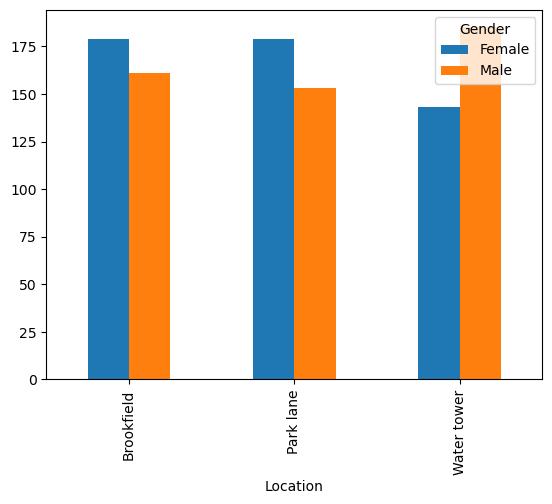

In [79]:
unstacked_sales.plot(kind = 'bar')

 4. Which location has more members vs which has less members?
 5. Which location has highest rating vs which has the lowest?

In [81]:
sales.head()

Invoice ID       Date   Time  Gender     Location     City Member  \
0   460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  
0  Groceries     30         1     30    Cash       2  
1    Fashion     35         5    175    Card       3  
2   Clothing     57         2    114    Cash       5  
3   Sporting     89         4    356    Gpay       1  
4      Books     82         5    410    Cash       4

In [82]:
# Member comparision
members = sales.groupby(['Member', 'Location']).count()['Invoice ID']
members

Member  Location   
No      Brookfield     173
        Park lane      167
        Water tower    159
Yes     Brookfield     167
        Park lane      165
        Water tower    169
Name: Invoice ID, dtype: int64

In [84]:
# Convert members to row and column
unstacked_members = members.unstack(level = 0)
unstacked_members

Member        No  Yes
Location             
Brookfield   173  167
Park lane    167  165
Water tower  159  169

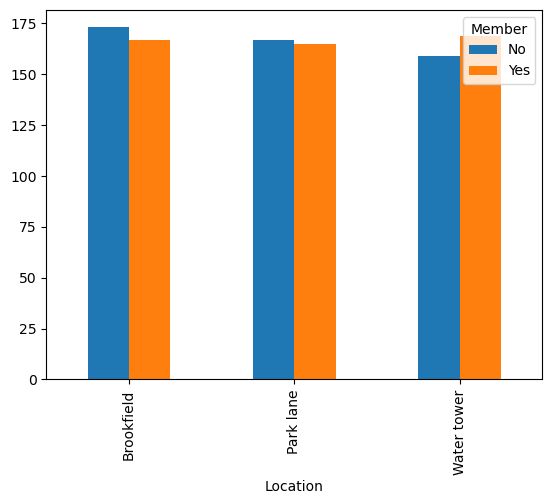

In [85]:
# Plot
unstacked_members.plot(kind = 'bar')
plt.show()

In [86]:
# Get average for each location
sales.groupby(['Location']).mean()

Invoice ID      Price  Quantity       Total    Rating
Location                                                            
Brookfield   4.986075e+08  51.973529  4.141176  212.179412  2.782353
Park lane    4.841016e+08  52.075301  4.048193  212.144578  3.021084
Water tower  5.007462e+08  49.243902  3.984756  198.826220  3.118902

In [87]:
# Get average rating  
rating = sales.groupby(['Location']).mean()['Rating']
rating

Location
Brookfield     2.782353
Park lane      3.021084
Water tower    3.118902
Name: Rating, dtype: float64

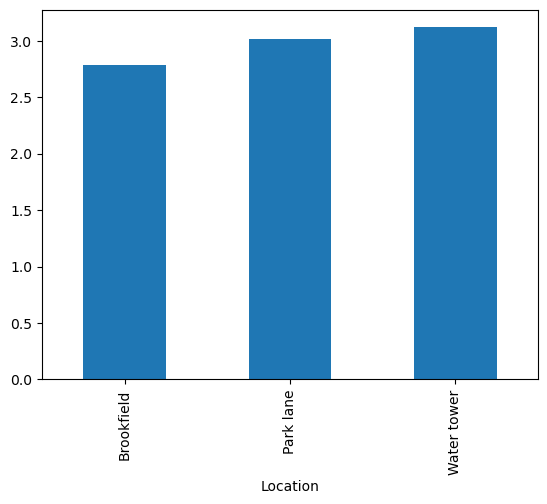

In [89]:
# Plot
rating.plot(kind = 'bar')
plt.show()


6. ***City:*** Which city has more female shopping?
7. ***Gender:*** Who spends more men or women?
8. ***Customer type:*** Which type of customer spends more member or a non member?
9. ***Product Line:*** Which Product line sells more?
10. ***Product Line:*** Which product line is popular among men vs women?

In [95]:
# Which city has more female shopping?
female_shoppers = sales.groupby(['Gender', 'City']).count()['Invoice ID']
female_shoppers

Gender  City   
Female  Chicago    143
        Dallas     179
        NewYork    179
Male    Chicago    185
        Dallas     153
        NewYork    161
Name: Invoice ID, dtype: int64

In [96]:
# Convert
unstack_female_shoppers = female_shoppers.unstack(level = 0)
unstack_female_shoppers

Gender   Female  Male
City                 
Chicago     143   185
Dallas      179   153
NewYork     179   161

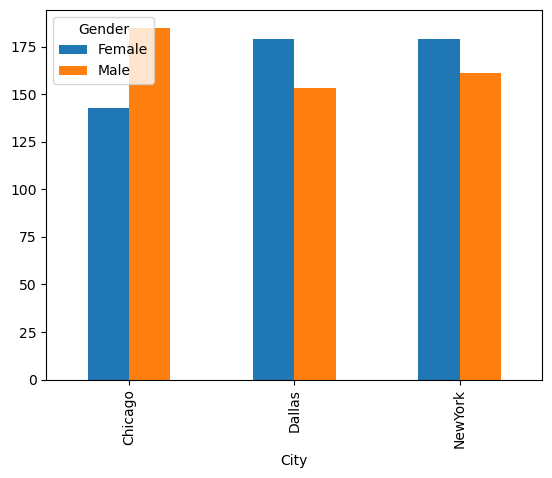

In [97]:
# Plot
unstack_female_shoppers.plot(kind = 'bar')
plt.show()

In [104]:
sales.groupby(['Gender']).sum()

Invoice ID  Price  Quantity   Total  Rating
Gender                                               
Female  253138028847  25474      2069  106452    1517
Male    241355024494  25638      1990  101336    1455

In [106]:
# Who spends more male or women?
gender_spends = sales.groupby(['Gender']).sum()['Total']
gender_spends

Gender
Female    106452
Male      101336
Name: Total, dtype: int64

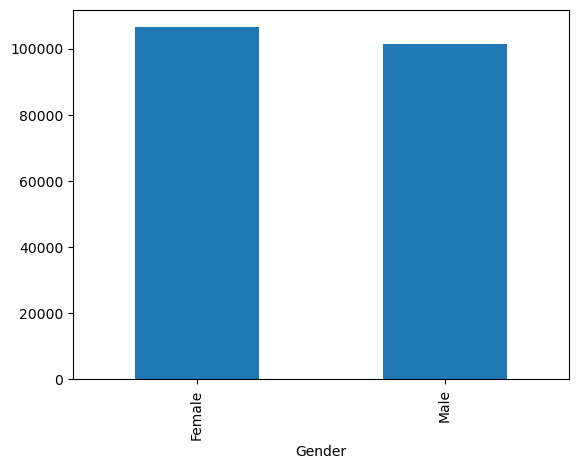

In [107]:
# plot
gender_spends.plot(kind = 'bar')
plt.show()

In [103]:
# Which type of customer spend more, members or non-members?
sales.head()

Invoice ID       Date   Time  Gender     Location     City Member  \
0   460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  
0  Groceries     30         1     30    Cash       2  
1    Fashion     35         5    175    Card       3  
2   Clothing     57         2    114    Cash       5  
3   Sporting     89         4    356    Gpay       1  
4      Books     82         5    410    Cash       4

In [108]:
members_total = sales.groupby(['Member']).sum()
members_total

Invoice ID  Price  Quantity   Total  Rating
Member                                               
No      242503049716  25129      2013  100245    1504
Yes     251990003625  25983      2046  107543    1468

In [112]:
member_spends = members_total['Total']
member_spends

Member
No     100245
Yes    107543
Name: Total, dtype: int64

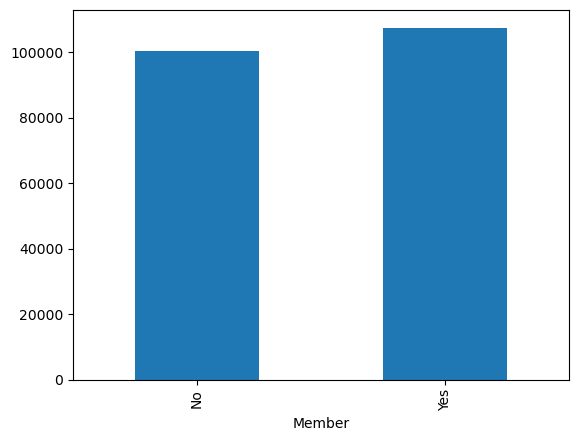

In [113]:
# plot
member_spends.plot(kind = 'bar')
plt.show()

In [115]:
# which product line sales more?
category_sales = sales.groupby(['Category']).count()['Rating']
category_sales


Category
Books        165
Clothing     170
Fashion      153
Furniture    160
Groceries    174
Sporting     178
Name: Rating, dtype: int64

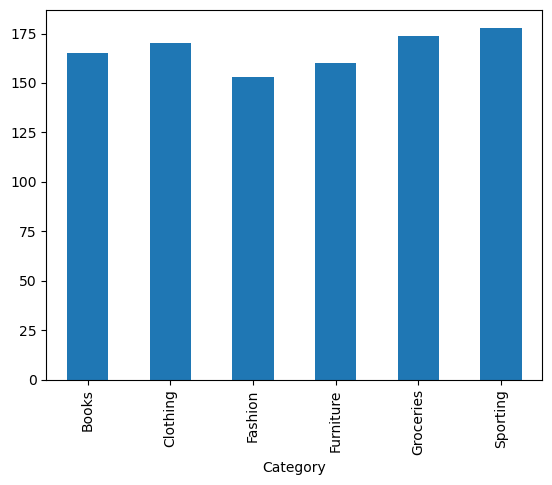

In [116]:
# plot
category_sales.plot(kind = 'bar')
plt.show()

In [125]:
# Which product line is more popular among men or women?
popular_category_sales = sales.groupby(['Gender', 'Category']).count()['Rating']
popular_category_sales

Gender  Category 
Female  Books        88
        Clothing     81
        Fashion      81
        Furniture    78
        Groceries    87
        Sporting     86
Male    Books        77
        Clothing     89
        Fashion      72
        Furniture    82
        Groceries    87
        Sporting     92
Name: Rating, dtype: int64

In [126]:
# Convert
unstacked_sales = popular_category_sales.unstack(level = 0)
unstacked_sales

Gender     Female  Male
Category               
Books          88    77
Clothing       81    89
Fashion        81    72
Furniture      78    82
Groceries      87    87
Sporting       86    92

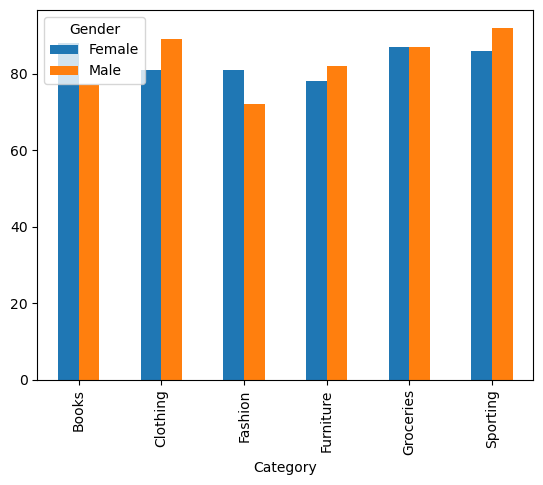

In [127]:
# plot
unstacked_sales.plot(kind = 'bar')
plt.show()

11. What days of the month make most sales?

In [129]:
sales['Date']

0      1/25/2018
1      3/19/2018
2      2/25/2018
3      1/22/2018
4      2/18/2018
         ...    
995    3/26/2018
996    2/20/2018
997     2/6/2018
998    1/29/2018
999    1/31/2018
Name: Date, Length: 1000, dtype: object

In [131]:
# What days of the month make most sales?

# Convert the format of the date
formated_date = pd.to_datetime(sales['Date'])
formated_date

0     2018-01-25
1     2018-03-19
2     2018-02-25
3     2018-01-22
4     2018-02-18
         ...    
995   2018-03-26
996   2018-02-20
997   2018-02-06
998   2018-01-29
999   2018-01-31
Name: Date, Length: 1000, dtype: datetime64[ns]

In [134]:
# Access the day
days = formated_date.dt.day
days

0      25
1      19
2      25
3      22
4      18
       ..
995    26
996    20
997     6
998    29
999    31
Name: Date, Length: 1000, dtype: int64

In [135]:
# Access the month
months = formated_date.dt.month
months

0      1
1      3
2      2
3      1
4      2
      ..
995    3
996    2
997    2
998    1
999    1
Name: Date, Length: 1000, dtype: int64

In [137]:
# Access the year
years = formated_date.dt.year
years

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
995    2018
996    2018
997    2018
998    2018
999    2018
Name: Date, Length: 1000, dtype: int64

In [138]:
# Add days to the original dataset
sales['Day'] = days
sales.head()

Invoice ID       Date   Time  Gender     Location     City Member  \
0   460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  Day  
0  Groceries     30         1     30    Cash       2   25  
1    Fashion     35         5    175    Card       3   19  
2   Clothing     57         2    114    Cash       5   25  
3   Sporting     89         4    356    Gpay       1   22  
4      Books     82         5    410    Cash       4   18

In [140]:
# Group the data based on days
daily_total = sales.groupby(['Day']).sum()
daily_total

Invoice ID  Price  Quantity  Total  Rating
Day                                             
1    14975286441   1560       110   6301      80
2    21354507267   2104       160   8247     113
3    16269596439   2145       135   8533      96
4    13686554819   1569       123   6593      82
5    16401610050   2199       165   9177     124
6    15877295986   1385       138   5976     102
7    19953790302   1613       152   6164     102
8    22160970191   2087       168   8313     125
9    16628296919   1950       168   9142     120
10   18243343828   1665       124   6444      92
11   13899020697   1121       112   4755      72
12   15041278911   1889       125   7714     107
13   16124023625   1348       120   5688      73
14   19897779193   2177       147   7978     121
15   22504221095   2228       183   9677     134
16   11865028171   1530       102   5912      80
17   14354189804   1483       127   5833      90
18   12772987794   1171        89   4625      74
19   16031759752   2015       158   7481     122
20   15168513911   1751       140   7333      94
21   12063450641   1010        79   4300      58
22   12226367501   1415       118   5788      82
23   17242946231   1737       141   6949     118
24   14530794280   1860       136   7819     114
25   19982756396   2284       169   8638     119
26   20885077058   1755       162   7165     117
27   20737444342   2077       147   8154     111
28   15658769129   1411       132   6467      93
29   10774623902   1193        82   4662      67
30   10496537848    692        92   3530      48
31    6684230818    688        55   2430      42

In [142]:
# Get total sales on each day
daily_sales = daily_total['Total']
daily_sales

Day
1     6301
2     8247
3     8533
4     6593
5     9177
6     5976
7     6164
8     8313
9     9142
10    6444
11    4755
12    7714
13    5688
14    7978
15    9677
16    5912
17    5833
18    4625
19    7481
20    7333
21    4300
22    5788
23    6949
24    7819
25    8638
26    7165
27    8154
28    6467
29    4662
30    3530
31    2430
Name: Total, dtype: int64

In [144]:
# Maximum sales
daily_max_sales = daily_sales.max()
daily_max_sales

9677

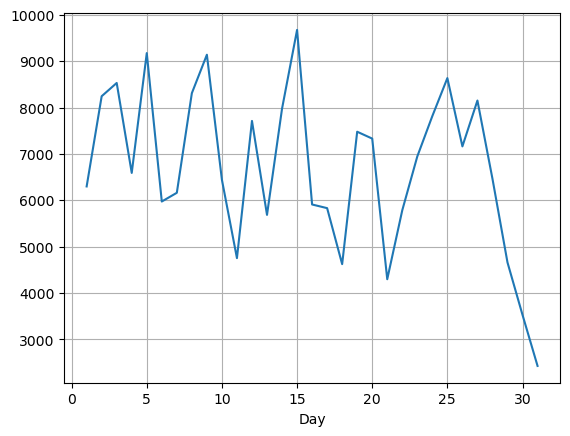

In [154]:
# What days of the month make most sales?
daily_sales.plot()
plt.grid()
plt.show()

12. Which month make the most sales?

In [147]:
# Add months to the dataset
sales['Month'] = months
sales.head()


Invoice ID       Date   Time  Gender     Location     City Member  \
0   460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  Day  Month  
0  Groceries     30         1     30    Cash       2   25      1  
1    Fashion     35         5    175    Card       3   19      3  
2   Clothing     57         2    114    Cash       5   25      2  
3   Sporting     89         4    356    Gpay       1   22      1  
4      Books     82         5    410    Cash       4   18      2

In [149]:
# Group the data based on month
monthly_total = sales.groupby(['Month']).sum()
monthly_total

Invoice ID  Price  Quantity  Total  Rating   Day
Month                                                    
1      178049046779  17856      1407  71652    1042  6013
2      141926291466  15825      1237  63850     924  4200
3      174517715096  17431      1415  72286    1006  5043

In [150]:
# Get monthly sales only
monthly_sales = monthly_total['Total']
monthly_sales

Month
1    71652
2    63850
3    72286
Name: Total, dtype: int64

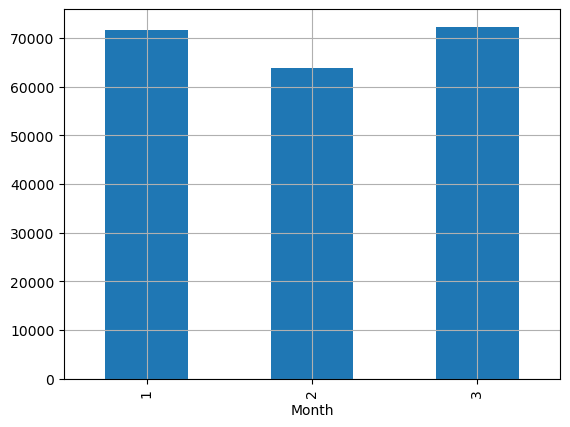

In [153]:
# Which months make the most sales?
monthly_sales.plot(kind='bar')
plt.grid()
plt.show()

13. Which Hour make the most sales?

In [155]:
sales.head()

Invoice ID       Date   Time  Gender     Location     City Member  \
0   460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  Day  Month  
0  Groceries     30         1     30    Cash       2   25      1  
1    Fashion     35         5    175    Card       3   19      3  
2   Clothing     57         2    114    Cash       5   25      2  
3   Sporting     89         4    356    Gpay       1   22      1  
4      Books     82         5    410    Cash       4   18      2

In [156]:
sales['Time']

0      16:46
1      16:48
2      13:33
3      13:38
4      15:31
       ...  
995    11:19
996    17:17
997    11:44
998    15:44
999    10:13
Name: Time, Length: 1000, dtype: object

In [160]:
# Format the time, get hour and add to the dataset
formated_time = pd.to_datetime(sales['Time'])
hours = formated_time.dt.hour
sales['Hour'] = hours
sales.head()

Invoice ID       Date   Time  Gender     Location     City Member  \
0   460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  Day  Month  Hour  
0  Groceries     30         1     30    Cash       2   25      1    16  
1    Fashion     35         5    175    Card       3   19      3    16  
2   Clothing     57         2    114    Cash       5   25      2    13  
3   Sporting     89         4    356    Gpay       1   22      1    13  
4      Books     82         5    410    Cash       4   18      2    15

In [161]:
# Group data based on hours
hours_total = sales.groupby(['Hour']).sum()
hours_total

Invoice ID  Price  Quantity  Total  Rating   Day  Month
Hour                                                          
10    49875425160   5219       393  20235     308  1557    210
11    42667920848   4815       380  20274     297  1397    175
12    44590196244   4443       351  17396     263  1383    195
13    49809694077   5470       418  22146     291  1413    223
14    39249640372   4131       306  15084     235  1278    168
15    48975356449   5451       437  23717     298  1515    200
16    37025932541   3634       305  14708     243  1260    137
17    38303524180   3465       307  14443     205  1066    140
18    48394980128   5045       389  20528     286  1407    190
19    53984476856   5862       456  24221     306  1806    218
20    41615906486   3577       317  15036     240  1174    137

In [162]:
# Get houly sales
hourly_sales = hours_total['Total']
hourly_sales

Hour
10    20235
11    20274
12    17396
13    22146
14    15084
15    23717
16    14708
17    14443
18    20528
19    24221
20    15036
Name: Total, dtype: int64

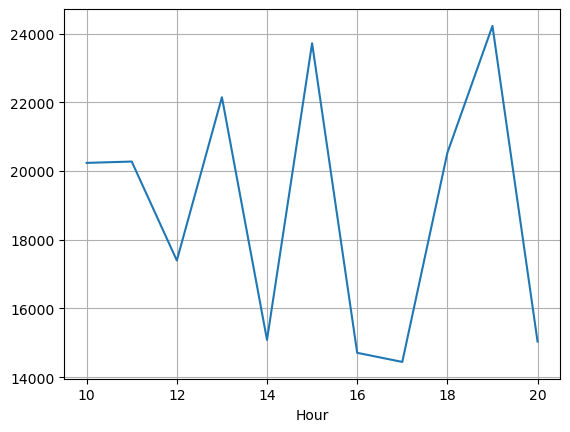

In [164]:
# which hour makes the most sales?
hourly_sales.plot(grid = True)
plt.show()

14. What time do people make more gpayments? vs What time do people make more cash payments?

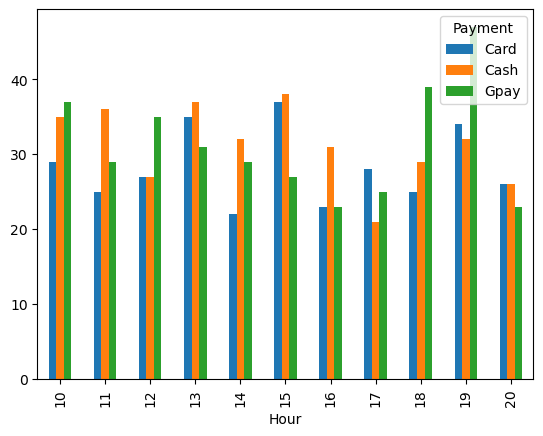

In [169]:
# Group the data in hours and payment
sales.groupby(['Payment', 'Hour']).count()['Invoice ID'].unstack(level=0).plot(kind='bar')
plt.show()